In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils import Padder

m = 1
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

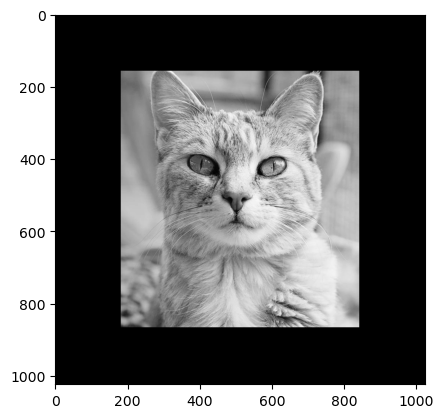

In [34]:
a = Image.open('cat.jpg').convert('L')
a = np.array(a)
a = Padder.pad_image(a)
M, N = a.shape
plt.imshow(a, 'gray')

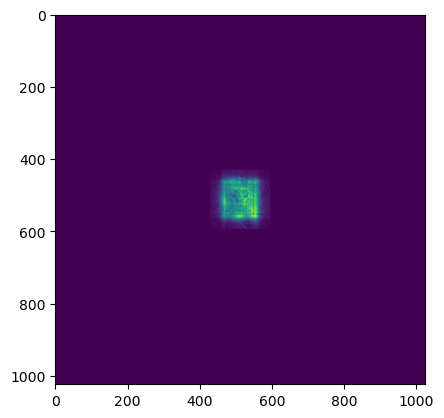

In [57]:
source_resolution = 10*um
lam = 633*nm
z = 1*m

x0 = source_resolution * np.arange(-N/2, N/2)
y0 = source_resolution * np.arange(-N/2, N/2)
X0, Y0 = np.meshgrid(x0, y0)
phase_0 = np.exp(1j*np.pi/lam/z * (X0**2 + Y0**2))

fresnel = a * phase_0
fresnel = np.fft.fftshift(np.fft.fft2(fresnel))

dx1 = lam*z/N/source_resolution
x1 = dx1 * np.arange(-N/2, N/2)
y1 = dx1 * np.arange(-N/2, N/2)
X1, Y1 = np.meshgrid(x1, y1)

phase_1 = (1/1j/lam/z) * np.exp(1j*2*np.pi/lam * z) * np.exp(1j*np.pi/lam/z * (X1**2 + Y1**2))
# prevent spherical wave aliasing
phase_1[np.abs(X1)>=z/np.sqrt((2*dx1/lam)**2 - 1)] = 0
phase_1[np.abs(Y1)>=z/np.sqrt((2*dx1/lam)**2 - 1)] = 0

fresnel = fresnel * phase_1
plt.imshow(np.abs(fresnel))

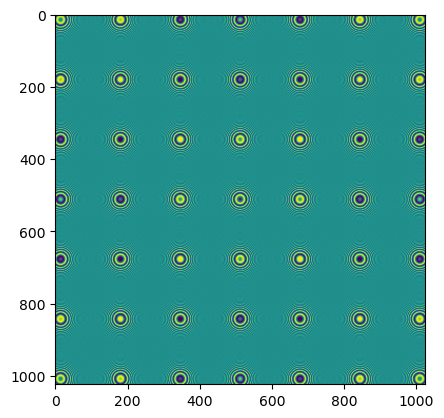

In [53]:
plt.imshow(np.real(phase_1))

In [54]:
phase_1[np.abs(X1)>=z/np.sqrt((2*dx1/lam)**2 - 1)] = 0
phase_1[np.abs(Y1)>=z/np.sqrt((2*dx1/lam)**2 - 1)] = 0

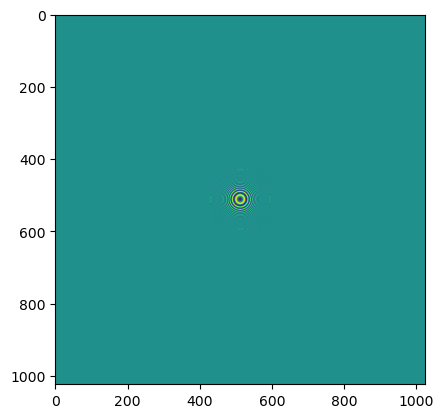

In [56]:
plt.imshow(np.real(phase_1))